In [166]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
from mpl_toolkits.mplot3d import Axes3D

In [167]:
cards=[1,2,3,4,5,6,7,8,9,10,10,10,10]

In [168]:
def getcard():
    num=np.random.randint(13)
    return cards[num]

Above is the list of values corresponding to each card (face cards have value 10,thus there are four 10s.) 

In [169]:
player_action=np.zeros([22,11,2],dtype=np.int)
dealer_action=np.zeros([22],dtype=np.int)
# player_action tell us player would take player_action[i] if sum of his cards is i

In [170]:
hit=0
stick=1
def assign_actions():
    for i in range(22):
        for j in range(11):
            for k in range(2):
                if(i==20 or i==21):
                    player_action[i,j,k]=stick
    for i in range(22):
        if(i>=17):
            dealer_action[i]=stick

In [171]:
def generate_episode(behaviour_policy,player_card1,player_card2,dealer_card1,dealer_card2):
    player_sum=0
    episode_playersum=[]
    episode_dealercard=[]
    episode_usable_ace=[]
#     1--> usable
#     0--> not usable

# Player's turn
    dealer_facedown=dealer_card1
    player_usable_ace=0
    player_count_ace=0
    player_natural=False
    if(player_card1==1):
        player_sum+=11
        player_usable_ace=1
        player_count_ace+=1
    else:
        player_sum+=player_card1
    if(player_card2==1):
        player_sum+=11
        player_usable_ace=1
        player_count_ace+=1
    else:
        player_sum+=player_card2

    if(player_sum>21 and player_usable_ace==1):
        player_sum-=10
        player_count_ace-=1
    episode_playersum.append(player_sum)
    episode_dealercard.append(dealer_facedown)
    episode_usable_ace.append(player_usable_ace)
    if(player_sum==21):
        player_natural=True
    if(behaviour_policy==False):
        while(player_sum<=21 and player_action[player_sum,dealer_facedown,player_usable_ace]==0):
            new_card=getcard()
            if(new_card==1):
                player_sum+=11
                player_usable_ace=1
                player_count_ace+=1
            else:
                player_sum+=new_card
            if(player_sum>21 and player_usable_ace==1):
                player_sum-=10
                player_count_ace-=1
                if(player_count_ace==0):
                    player_usable_ace=1
            episode_playersum.append(player_sum)
            episode_dealercard.append(dealer_facedown)
            episode_usable_ace.append(player_usable_ace)
    else:
        while(player_sum<=21):
            val=np.random.randint(2)
            if(val==0):
                new_card=getcard()
                if(new_card==1):
                    player_sum+=11
                    player_usable_ace=1
                    player_count_ace+=1
                else:
                    player_sum+=new_card
                if(player_sum>21 and player_usable_ace==1):
                    player_sum-=10
                    player_count_ace-=1
                    if(player_count_ace==0):
                        player_usable_ace=1
                episode_playersum.append(player_sum)
                episode_dealercard.append(dealer_facedown)
                episode_usable_ace.append(player_usable_ace)
            else:
                break

# Dealer's turn
    dealer_usable_ace=0
    dealer_count_ace=0
    dealer_sum=0
    dealer_natural=False
    if(dealer_card1==1):
        dealer_sum+=11
        dealer_usable_ace=1
        dealer_count_ace+=1
    else:
        dealer_sum+=dealer_card1
    if(dealer_card2==1):
        dealer_sum+=11
        dealer_usable_ace=1
        dealer_count_ace+=1
    else:
        dealer_sum+=dealer_card2

    if(dealer_sum>21 and dealer_usable_ace==1):
        dealer_sum-=10
        dealer_count_ace-=1
    if(dealer_sum==21):
        dealer_natural=True
    while(dealer_sum<=21 and dealer_action[dealer_sum]==0):
        new_card=getcard()
        if(new_card==1):
            dealer_sum+=11
            dealer_usable_ace=1
            dealer_count_ace+=1
        else:
            dealer_sum+=new_card
        if(dealer_sum>21 and dealer_usable_ace==1):
            dealer_sum-=10
            dealer_count_ace-=1
            if(dealer_count_ace==0):
                dealer_usable_ace=1
# comaring sum
    if(player_sum>21):
        return   -1,episode_playersum,episode_dealercard,episode_usable_ace
    if(player_sum==21 and player_natural==True and dealer_natural==False):
        return   1,episode_playersum,episode_dealercard,episode_usable_ace
    if(dealer_sum>21):
        return   1,episode_playersum,episode_dealercard,episode_usable_ace
    if(player_sum>dealer_sum):
        return   1,episode_playersum,episode_dealercard,episode_usable_ace
    if(player_sum==dealer_sum):
        return   0,episode_playersum,episode_dealercard,episode_usable_ace
    if(player_sum<dealer_sum):
        return   -1,episode_playersum,episode_dealercard,episode_usable_ace


        
    

In [172]:
def plot_graph_usable_ace(v_usable_ace):
    x=[]
    y=[]
    for i in range(10):
        x.append(12+i)
        y.append(1+i)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y,v_usable_ace,)
    ax.set_xlabel('player sum')
    ax.set_ylabel('dealer showing')
    ax.set_title('usable_ace');

In [173]:
def policy_graph_usable_ace(pi_usable_ace):
    x=[]
    y=[]
    for i in range(10):
        x.append(12+i)
        y.append(1+i)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y,v_usable_ace,)
    ax.set_xlabel('player sum')
    ax.set_ylabel('dealer showing')
    ax.set_title('usable_ace');

In [174]:
def plot_graph_non_usable_ace(v_non_usable_ace):
    x=[]
    y=[]
    for i in range(10):
        x.append(12+i)
        y.append(1+i)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y,v_non_usable_ace,)
    ax.set_xlabel('player sum')
    ax.set_ylabel('dealer showing')
    ax.set_title('non_usable_ace');

In [175]:
def policy_graph_non_usable_ace(pi_non_usable_ace):
    x=[]
    y=[]
    for i in range(10):
        x.append(12+i)
        y.append(1+i)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y,v_non_usable_ace,)
    ax.set_xlabel('player sum')
    ax.set_ylabel('dealer showing')
    ax.set_title('non_usable_ace');

In [180]:
# montecarlo evaluation fig5.1
def policy_evaluation(simulations):
    assign_actions()
    v_usable_ace=np.zeros([10,10])
    v_non_usable_ace=np.zeros([10,10])
    count_usable_ace=np.zeros([10,10])
    count_non_usable_ace=np.zeros([10,10])
    for j in range(simulations):
        player_card1=1
        player_card2=1
        dealer_card1=2
        dealer_card2=getcard()
        visited=np.zeros([10,10,2],dtype=np.int)
        r,episode_playersum,episode_dealercard,episode_usable_ace=generate_episode(False,player_card1,player_card2,dealer_card1,dealer_card2)
        length=len(episode_playersum)
        for i in range(length):
            sum_player=episode_playersum[i]-12
            card_dealer=episode_dealercard[i]-1
            usable=episode_usable_ace[i]
            if(sum_player<=9 and card_dealer<=9 and visited[sum_player,card_dealer,usable]==0 and usable==1):
                v_usable_ace[sum_player,card_dealer]=(v_usable_ace[sum_player,card_dealer]*count_usable_ace[sum_player,card_dealer]+r)/(count_usable_ace[sum_player,card_dealer]+1)
                count_usable_ace[sum_player,card_dealer]+=1
                visited[sum_player,card_dealer,usable]=1
            elif(sum_player<=9 and card_dealer<=9 and visited[sum_player,card_dealer,usable]==0 and usable==0):
                v_non_usable_ace[sum_player,card_dealer]=(v_non_usable_ace[sum_player,card_dealer]*count_non_usable_ace[sum_player,card_dealer]+r)/(count_non_usable_ace[sum_player,card_dealer]+1)
                count_non_usable_ace[sum_player,card_dealer]+=1
                visited[sum_player,card_dealer,usable]=1
        visited=np.zeros([10,10,2],dtype=np.int)
    plot_graph_usable_ace(v_usable_ace)
    plot_graph_non_usable_ace(v_non_usable_ace)
    

In [181]:
def explore_montecarlo(simulations):
    # monte_carlo exploration and policy improvment
    assign_actions()
    # 0 means hit
    # 1 means stick
    #     last dimension tells the action in q
    q_usable_ace=np.zeros([10,10,2])
    v_usable_ace=np.zeros([10,10])
    v_non_usable_ace=np.zeros([10,10])
    pi_usable_ace=np.zeros([10,10])
    pi_non_usable_ace=np.zeros([10,10])
    q_non_usable_ace=np.zeros([10,10,2])
    count_usable_ace=np.zeros([10,10,2])
    count_non_usable_ace=np.zeros([10,10,2])
    for j in range(simulations):
        player_card1=getcard()
        player_card2=getcard()
        dealer_card1=getcard()
        dealer_card2=getcard()
        visited=np.zeros([10,10,2,2],dtype=np.int)
    #     last dimension tells the action in visited
        r,episode_playersum,episode_dealercard,episode_usable_ace=generate_episode(False,player_card1,player_card2,dealer_card1,dealer_card2)
        length=len(episode_playersum)
        for i in range(length):
            sum_player=episode_playersum[i]-12
            card_dealer=episode_dealercard[i]-1
            usable=episode_usable_ace[i]
            if(i==length-1 ):
                if(sum_player<=9 and card_dealer<=9 and usable==1 and visited[sum_player,card_dealer,usable,1]==0):
                    q_usable_ace[sum_player,card_dealer,1]=(q_usable_ace[sum_player,card_dealer,1]*count_usable_ace[sum_player,card_dealer,1]+r)/(count_usable_ace[sum_player,card_dealer,1]+1)
                    count_usable_ace[sum_player,card_dealer,1]+=1
                    visited[sum_player,card_dealer,usable,1]=1
                    if(q_usable_ace[sum_player,card_dealer,1]>q_usable_ace[sum_player,card_dealer,0]):
                        player_action[sum_player+12,card_dealer+1,1]=1
                    else:
                        player_action[sum_player+12,card_dealer+1,1]=0
                elif(sum_player<=9 and card_dealer<=9 and usable==0 and visited[sum_player,card_dealer,usable,1]==0):
                    q_non_usable_ace[sum_player,card_dealer,1]=(q_non_usable_ace[sum_player,card_dealer,1]*count_non_usable_ace[sum_player,card_dealer,1]+r)/(count_non_usable_ace[sum_player,card_dealer,1]+1)
                    count_non_usable_ace[sum_player,card_dealer,1]+=1
                    visited[sum_player,card_dealer,usable,1]=1
                    if(q_non_usable_ace[sum_player,card_dealer,1]>q_non_usable_ace[sum_player,card_dealer,0]):
                        player_action[sum_player+12,card_dealer+1,0]=1
                    else:
                        player_action[sum_player+12,card_dealer+1,0]=0
            else:
                if(sum_player<=9 and card_dealer<=9 and usable==1 and visited[sum_player,card_dealer,usable,0]==0):
                    q_usable_ace[sum_player,card_dealer,0]=(q_usable_ace[sum_player,card_dealer,0]*count_usable_ace[sum_player,card_dealer,0]+r)/(count_usable_ace[sum_player,card_dealer,0]+1)
                    count_usable_ace[sum_player,card_dealer,0]+=1
                    visited[sum_player,card_dealer,usable,0]=1
                    if(q_usable_ace[sum_player,card_dealer,1]>q_usable_ace[sum_player,card_dealer,0]):
                        player_action[sum_player+12,card_dealer+1,1]=1
                    else:
                        player_action[sum_player+12,card_dealer+1,1]=0
                elif(sum_player<=9 and card_dealer<=9 and usable==0 and visited[sum_player,card_dealer,usable,0]==0):
                    q_non_usable_ace[sum_player,card_dealer,0]=(q_non_usable_ace[sum_player,card_dealer,0]*count_non_usable_ace[sum_player,card_dealer,0]+r)/(count_non_usable_ace[sum_player,card_dealer,0]+1)
                    count_non_usable_ace[sum_player,card_dealer,0]+=1
                    visited[sum_player,card_dealer,usable,0]=1
                    if(q_non_usable_ace[sum_player,card_dealer,1]>q_non_usable_ace[sum_player,card_dealer,0]):
                        player_action[sum_player+12,card_dealer+1,0]=1
                    else:
                        player_action[sum_player+12,card_dealer+1,0]=0
        visited=np.zeros([10,10,2,2],dtype=np.int)
    for i in range(10):
        for j in range(10):
            v_usable_ace[i,j]=max(q_usable_ace[i,j,0],q_usable_ace[i,j,1])
            v_non_usable_ace[i,j]=max(q_non_usable_ace[i,j,0],q_usable_ace[i,j,1])
    for i in range(10):
        for j in range(10):
            pi_non_usable_ace=player_action[i+12,j+1,0]
            pi_usable_ace=player_action[i+12,j+1,1]
    print("optimal policy:")
    policy_graph_non_usable_ace(pi_non_usable_ace)
    policy_graph_usable_ace(pi_usable_ace)
    print("optimal value")
    plot_graph_usable_ace(v_usable_ace)
    plot_graph_non_usable_ace(v_non_usable_ace)

In [195]:
def off_policy_ordinary(simulations):
    assign_actions()
    v_usable_ace=np.zeros([10,10])
    v_non_usable_ace=np.zeros([10,10])
    count_usable_ace=np.zeros([10,10])
    count_non_usable_ace=np.zeros([10,10])
    for j in range(simulations):
        player_card1=2
        player_card2=1
        dealer_card1=2
        dealer_card2=getcard()
        visited=np.zeros([10,10,2],dtype=np.int)
        r,episode_playersum,episode_dealercard,episode_usable_ace=generate_episode(True,player_card1,player_card2,dealer_card1,dealer_card2)
        length=len(episode_playersum)
        for i in range(length):
            sum_player=episode_playersum[i]-12
            card_dealer=episode_dealercard[i]-1
            usable=episode_usable_ace[i]
            if(sum_player<=9 and card_dealer<=9 and visited[sum_player,card_dealer,usable]==0 and usable==1):
                v_usable_ace[sum_player,card_dealer]=(v_usable_ace[sum_player,card_dealer]*count_usable_ace[sum_player,card_dealer]+r*pow(1/0.5,length-i-1))/(count_usable_ace[sum_player,card_dealer]+1)
                count_usable_ace[sum_player,card_dealer]+=1
                visited[sum_player,card_dealer,usable]=1
            elif(sum_player<=9 and card_dealer<=9 and visited[sum_player,card_dealer,usable]==0 and usable==0):
                v_non_usable_ace[sum_player,card_dealer]=(v_non_usable_ace[sum_player,card_dealer]*count_non_usable_ace[sum_player,card_dealer]+r*pow(1/0.5,length-i-1))/(count_non_usable_ace[sum_player,card_dealer]+1)
                count_non_usable_ace[sum_player,card_dealer]+=1
                visited[sum_player,card_dealer,usable]=1
        visited=np.zeros([10,10,2],dtype=np.int)
    print("usable ace:")
    print(v_usable_ace)
    print()
    print(v_non_usable_ace)

fig1
10000 episodes


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


500000 episodes




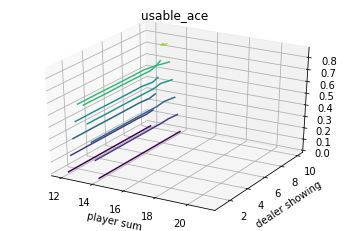

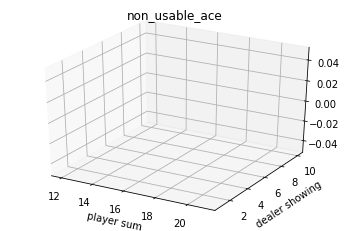

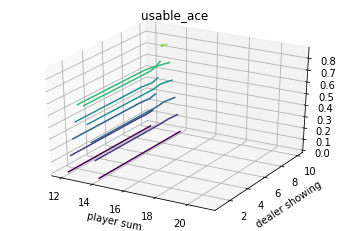

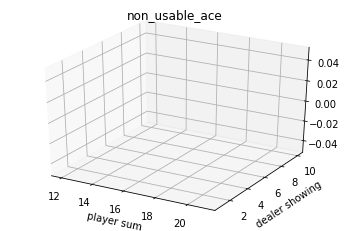

In [189]:
print("fig1")
print("10000 episodes")
policy_evaluation(10000)
print("500000 episodes")
policy_evaluation(500000)
print()
print()


fig2
optimal policy:
optimal value




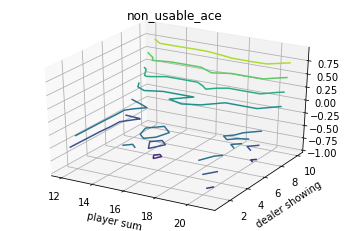

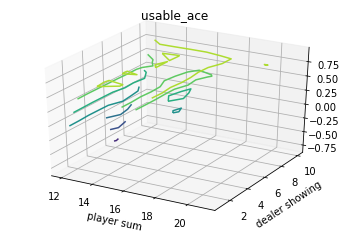

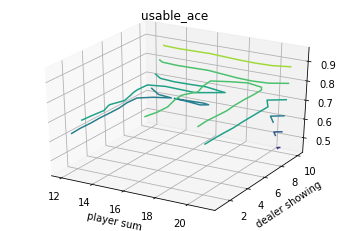

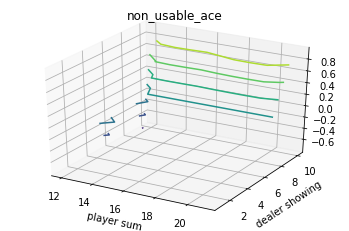

In [192]:
print("fig2")
explore_montecarlo(500000)
print()
print()



In [196]:
print("off policy optimal value")
off_policy_ordinary(500000)

off policy optimal value
usable ace:
[[ 0.          0.68538799  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -1.386524    0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -1.45462688  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -2.22557945  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -1.63549127  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -1.19623401  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -3.98035518  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -6.8357579   0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          1.96367533  